['čas', 'pismo', 'o.', 'm.', 'knjiga', 'knjižara', 'pismo', 'dan', 'knjiga', 'o.', 'm.', 'pismo', 'o.', 'm.', 'vest', 'knjiga', 'žalost', 'tetka', 'dan', 'sarana', 'član', 'porodica', 'pismo', 'grip', 'grip', 'kost', 'mati', 'mesecu', 'kuća', 'imanje', 'gospodar', 'pisanje', 'pošta', 'nedaća', 'gđu', 'mama', 'knjiga', 'rečnik', 'pošta', 'februar', 'pismo', 'odgovor', 'pismo', 'knjiga', 'danima', 'januar', 'minuta', 'vrijeme', 'prijatelj', 'febr', 'pismo', 'zadocnjenje', 'red', 'pismo', 'knjiga', 'dan', 'pismo', 'raskršć', 'skverove', 'sada', 'cveće', 'vrijeme', 'stan', 'pravo', 'chez', 'soi', 'vrijeme', 'vreme', 'biblioteka', 'knjiga', 'miss', 'film', 'bal', 'Iturba', 'dobro', 'dan', 'razonoditi', 'vrijeme', 'rat', 'varoša', 'gđu', 'mama', 'mart', 'zdravlje', 'proletnja', 'vrijeme', 'vjetrov', 'košava', 'živce', 'čovjek', 'Konsulat', 'vreme', 'čitanje', 'univerzitet', 'karneval', 'cirkus', 'prilika', 'utisk', 'mišljenje', 'impresija', 'ljeto', 'red', 'ministarstvo', 'biće', 'svijet', '

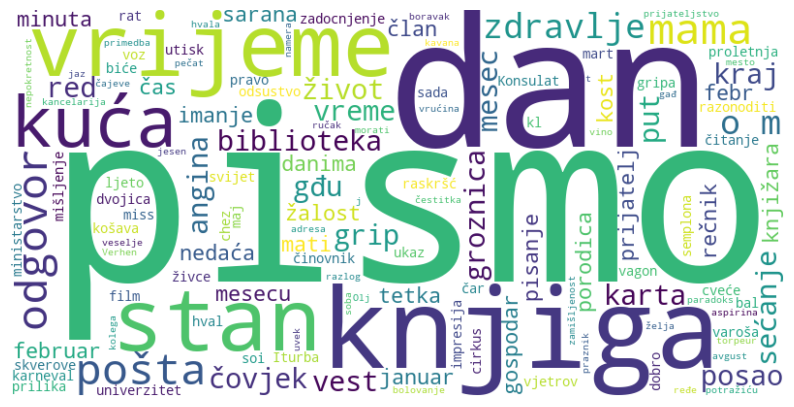

Marselj 26. І. 27. 51, Rue St. NEUTRAL
Jaques, 51. NEUTRAL
Draga gđo. NEUTRAL
Vera, ovaj čas sam primio vaše pismo od 23 o. m. i ne mogu da se načudim da niste primili ni knjigu koju Vam je poslala ovdašnja knjižara Fueri, preporučeno, ni moje pismo koje sam nekoliko dana docnije pisao. NEUTRAL
Knjiga je poslana 14 o. m. a moje pismo 17 ili 18 o. m. Očekujem vaše vesti i nadam se da ćete bar knjigu primiti. NEUTRAL
Kako vidite, ja sam opet u žalosti. NEUTRAL
Moja tetka u Višegradu umrla je naglo pre četiri dana. NEUTRAL
Nisam mogao ni na saranu otići. NEUTRAL
I da je nisam toliko volio, koliko sam, bilo bi mi teško  već stoga što je to poslednji član naše porodice. NEUTRAL
Upravo, poslednji sam ja. NEUTRAL
Kao što sam Vam u pismu od 17. javio, ja sam, vrativši se iz Pariza, prebolio i grip i anginu. NEUTRAL
Angina je prošla ali mi je grip još uvek u kostima. NEUTRAL
Možda ću već u maju mesecu ići u Višegrad da sredim kuću i ono malo imanja koje je sada bez gospodara. NEUTRAL
Verovatno 

In [ ]:
import spacy;
import text_formatter;
import sklearn;
import wordcloud;
import matplotlib.pyplot as plot;
import nltk;
import pandas as pa;

from text_formatter import text_cleaner;
from sklearn.feature_extraction.text import TfidfVectorizer;
from wordcloud import WordCloud;
from nltk.sentiment.vader import SentimentIntensityAnalyzer;
from sklearn.decomposition import NMF;

# Preprocess the text using a text cleaning function
cleaned_text = text_cleaner();

# Load the Croatian NLP model
nlp = spacy.load("hr_core_news_md");

# Process the cleaned text using spaCy
doc = nlp(cleaned_text);

# Extracting key words from the text

key_words = [];

# Identify and collect important nouns that are not stop words
for token in doc:
    if (token.text.lower() not in nlp.Defaults.stop_words and 
        token.lemma_ not in nlp.Defaults.stop_words and 
        token.pos_ == "NOUN"):
        key_words.append(token.lemma_);

print(key_words); 

# Convert the list of extracted nouns into a single text string
key_words_text = " ".join(key_words);

# Compute TF-IDF (Term Frequency-Inverse Document Frequency)
tfidf_vec = TfidfVectorizer();
matrica = tfidf_vec.fit_transform([key_words_text]);

# Extract the top 3 most significant words based on TF-IDF scores
top_three = sorted(tfidf_vec.vocabulary_, key=lambda x: matrica[0, tfidf_vec.vocabulary_[x]], reverse=True)[:3];

print(top_three);

# Generate a word cloud from extracted key words

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    max_words=200       
).generate(key_words_text);

# Display the word cloud
plot.figure(figsize=(10, 6));
plot.imshow(wordcloud, interpolation="bilinear");
plot.axis("off");  # Bez ose
plot.show();

# Sentiment Analysis using VADER

analyzer = SentimentIntensityAnalyzer();

for s in doc.sents:
    sentiment_score = analyzer.polarity_scores(s.text)["compound"]
    print(s,
          "POSITIVE" if sentiment_score > 0.33 else
          "NEGATIVE" if sentiment_score < -0.33 else
          "NEUTRAL");

# Topic Modeling using Non-Negative Matrix Factorization (NMF)

# Load stop words from the NLP model
stop_words = list(nlp.Defaults.stop_words);

# Load dataset containing letters or textual data for topic modeling
letters = pa.read_csv("teme.csv");

# TF-IDF vectorization with filtering based on document frequency
tfidf_vec_2 = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=stop_words);

# Create a document-term matrix (DTM)
dtm = tfidf_vec_2.fit_transform(letters["Pisma"]);

# Apply NMF for topic extraction
model = NMF(n_components=4, random_state=42);
model.fit(dtm);

# Print the most relevant words for each topic
for index, topic in enumerate(model.components_):
    print("Tema", index, "sadrzi sledece rijeci:");
    print([tfidf_vec_2.get_feature_names_out()[i] for i in topic.argsort()[-10:]]);
    print("\n");